In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

In [7]:
# define tank model
def tank(Level,time,valve,DeltaP,FlowOut):
    Cv = 0.0001     # valve size
    rho = 1000.0 # water density (kg/m^3)
    A = 0.5      # tank area (m^2)
    gs = 1.0     # specific gravity
    # inlet mass flow
    FlowIn = rho * Cv * valve * np.sqrt(DeltaP/gs)
    # leak outlet flow
    LeakOut = 5.0*Level
    # calculate derivative of the Level
    if Level <= 0.0:
        dLevel_dt = 0.0 # for drained tank
    else:
        dLevel_dt = (FlowIn-FlowOut-LeakOut)/(rho*A)
    return dLevel_dt

In [8]:
tf = 3000.0           # final time
n = int(tf + 1) # number of time points

# time span for the simulation, cycle every 0.1 sec
ts = np.linspace(0,tf,n)
delta_t = ts[1] - ts[0]

# disturbances
DP = np.ones(n)*12.0
Fout = np.ones(n)*2.0
Fin = np.zeros(n)

# Desired level (set point)
SP = 1.0
# level initial condition
Level0 = SP

# initial valve position
valve = 20.0
# Controller bias
ubias = valve
# valve opening (0-100%)
u = np.ones(n) * valve

# for storing the results
z = np.ones(n)*Level0

Cv = 0.0001     # valve size
rho = 1000.0 # water density (kg/m^3)
A = 0.5      # tank area (m^2)
gs = 1.0     # specific gravity

**Case A (Feedforward Control)**: Install flow transmitter on inlet flow line and use as a feedforward to the level controller.

**Case B (Cascade Control)**: Install flow transmitter on inlet flow line and develop flow controller as an inner loop to the level controller.

**Case C (Feedforward Control)**: Install flow transmitter on outlet flow line and use as a feedforward to the level controller.

In [9]:
# Step Response (uncomment select case)
# Case A
DP[1000:] = 22.0
# Case B
#u[1000:] = 30.0 
# Case C
#Fout[1000:] = 3.0

In [10]:
# simulate with ODEINT
for i in range(n-1):
    valve = u[i]

    # inlet mass flow
    Fin[i] = rho * Cv * valve * np.sqrt(DP[i]/gs)

    #if i==500:
    #    valve = 30.0
    #u[i+1] = valve   # store the valve position
    y = odeint(tank,Level0,[0,0.1],args=(valve,DP[i],Fout[i]))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting
Fin[-1] = Fin[-2]

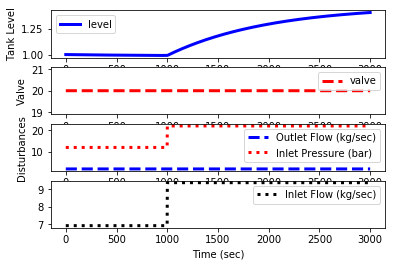

In [11]:
# plot results
plt.figure()
plt.subplot(4,1,1)
plt.plot(ts,z,'b-',linewidth=3,label='level')
plt.ylabel('Tank Level')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(ts,u,'r--',linewidth=3,label='valve')
plt.ylabel('Valve')    
plt.legend(loc=1)
plt.subplot(4,1,3)
plt.plot(ts,Fout,'b--',linewidth=3,label='Outlet Flow (kg/sec)')
plt.plot(ts,DP,'r:',linewidth=3,label='Inlet Pressure (bar)')
plt.ylabel('Disturbances')    
plt.legend(loc=1)
plt.subplot(4,1,4)
plt.plot(ts,Fin,'k:',linewidth=3,label='Inlet Flow (kg/sec)')
plt.xlabel('Time (sec)')
plt.legend(loc=1)

plt.show()

Using above plots, we can find required feedforward gain value to feedforward controller at the inlet.